In [1]:
from langchain.chat_models import init_chat_model
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode, tools_condition

/Users/pg47711/Downloads/langgraph-bootcamp/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]

In [4]:
@tool
def get_stock_price(symbol: str) -> float:
    '''Return the current price of a stock given the stock symbol
    :param symbol: stock symbol
    :return: current price of the stock
    '''
    return {
        "MSFT": 200.3,
        "AAPL": 100.4,
        "AMZN": 150.0,
        "RIL": 87.6
    }.get(symbol, 0.0)

tools = [get_stock_price]
from custom_llm import ChatNetAppLLM
llm = ChatNetAppLLM()
llm_with_tools = llm.bind_tools(tools)

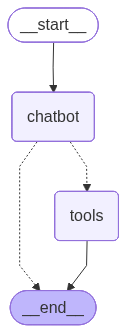

In [15]:
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

builder = StateGraph(State)

builder.add_node(chatbot)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "chatbot")
builder.add_conditional_edges("chatbot", tools_condition)

graph = builder.compile()

from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [14]:
state = graph.invoke({"messages": [{"role": "user", "content": "What is the price of AAPL stock right now?"}]})
print(state["messages"][-1].content)

[DEBUG] Sending 1 tools to API
[DEBUG] Request URL: https://llm-proxy-api.ai.eng.netapp.com/v1/chat/completions
[DEBUG] Request data: {
  "model": "gpt-5",
  "user": "pg47711",
  "messages": [
    {
      "role": "user",
      "content": "What is the price of AAPL stock right now?"
    }
  ],
  "tools": [
    {
      "type": "function",
      "function": {
        "name": "get_stock_price",
        "description": "Return the current price of a stock given the stock symbol\n    :param symbol: stock symbol\n    :return: current price of the stock",
        "parameters": {
          "properties": {
            "symbol": {
              "type": "string"
            }
          },
          "required": [
            "symbol"
          ],
          "type": "object"
        }
      }
    }
  ],
  "tool_choice": "auto"
}
[DEBUG] Response status: 200
[DEBUG] Response: {"id":"chatcmpl-CQ5BpNdKugkVCDjJW8pvZXl0qU3sX","created":1760332513,"model":"gpt-5-2025-08-07","object":"chat.completion","choic

In [12]:
state = graph.invoke({"messages": [{"role": "user", "content": "Who invented theory of relativity? print person name only"}]})
print(state["messages"][-1].content)

[DEBUG] Sending 1 tools to API
[DEBUG] Request URL: https://llm-proxy-api.ai.eng.netapp.com/v1/chat/completions
[DEBUG] Request data: {
  "model": "gpt-5",
  "user": "pg47711",
  "messages": [
    {
      "role": "user",
      "content": "Who invented theory of relativity? print person name only"
    }
  ],
  "tools": [
    {
      "type": "function",
      "function": {
        "name": "get_stock_price",
        "description": "Return the current price of a stock given the stock symbol\n    :param symbol: stock symbol\n    :return: current price of the stock",
        "parameters": {
          "properties": {
            "symbol": {
              "type": "string"
            }
          },
          "required": [
            "symbol"
          ],
          "type": "object"
        }
      }
    }
  ],
  "tool_choice": "auto"
}
[DEBUG] Response status: 200
[DEBUG] Response: {"id":"chatcmpl-CQ59pqbyoPjbpJjSvYP2yc4u1VEmU","created":1760332389,"model":"gpt-5-2025-08-07","object":"chat.com

In [8]:
msg = "I want to buy 20 AMZN stocks using current price. Then 15 MSFT. What will be the total cost?"

state = graph.invoke({"messages": [{"role": "user", "content": msg}]})
print(state["messages"][-1].content)

[DEBUG] Sending 1 tools to API
[DEBUG] Request URL: https://llm-proxy-api.ai.eng.netapp.com/v1/chat/completions
[DEBUG] Request data: {
  "model": "gpt-5",
  "user": "pg47711",
  "messages": [
    {
      "role": "user",
      "content": "I want to buy 20 AMZN stocks using current price. Then 15 MSFT. What will be the total cost?"
    }
  ],
  "tools": [
    {
      "type": "function",
      "function": {
        "name": "get_stock_price",
        "description": "Return the current price of a stock given the stock symbol\n    :param symbol: stock symbol\n    :return: current price of the stock",
        "parameters": {
          "properties": {
            "symbol": {
              "type": "string"
            }
          },
          "required": [
            "symbol"
          ],
          "type": "object"
        }
      }
    }
  ],
  "tool_choice": "auto"
}
[DEBUG] Response status: 200
[DEBUG] Response: {"id":"chatcmpl-CQ56G8Njn3Bcw2KrtmzAUeC7OLc9r","created":1760332168,"model":"g